# Model Selection Tutorial


## Model Selection and Regulation:
## Background reading:
Intro to Statistical Learning:
6.1 and 6.2

### Ethical Algorithm:
Chapter 2

### Dataset:
Freddie Mac Single Family Loan-Level Dataset: https://www.freddiemac.com/research/datasets/sf-loanlevel-dataset

Description of data fields: https://www.freddiemac.com/fmac-resources/research/pdf/file_layout.xlsx

The Federal Home Loan Mortgage Corporation, commonly known as Freddie Mac, is a publicly traded, government-sponsored enterprise, headquartered in Tysons Corner, Virginia. The FHLMC was created in 1970 to expand the secondary market for mortgages in the US: https://en.wikipedia.org/wiki/Freddie_Mac

The Federal National Mortgage Association, commonly known as Fannie Mae, is a United States government-sponsored enterprise and, since 1968, a publicly traded company: https://en.wikipedia.org/wiki/Fannie_Mae

The primary difference between Freddie Mac and Fannie Mae is where they source their mortgages from. Fannie Mae buys mortgages from larger, commercial banks, while Freddie Mac buys them from much smaller banks.

Dataset: Home Mortgage Disclosure Act, National Loan Applications for 2020 https://ffiec.cfpb.gov/data-publication/dynamic-national-loan-level-dataset/2020

Data field definitions/values: https://ffiec.cfpb.gov/data-browser/data/2023?category=counties&items=42003

In this tutorial we will use the dataset with the following attributes as an example: 31 Attributes In the dataset. We are going to use the following:

Credit Score First Time Homebuyer flag Original Debt to Income Ratio Number of Borrowers Original Interest Rate - this is what we want to predict This is a case of prediction because we want to predict a buyer’s mortgage interest rate (outcome) based on application information (predictors)

### Essence of Data:
### Why might you want to use model selection:
It can be easy to over fit a model if not using model selection. Using model Selection can help you create a model that best balances the bias variance trade off.

### How to compare different models?
There are many different model selection criterion that can be used to compare models. AIC, BIC, Mallow’s CP, adjusted R2
 and other selection criterion that penalize more complex models used to be the best way to compare models. However, with increase of computing process, validation and cross validation have become a more accurate and still accessible way of comparing models. With new computational power, we can now calculate MSE of a test set as well as use cross validation and MSE to work with parameter tuning in certain models.

## Forward vs backwards selection
### Forward selection:
Begins with a model that contains no variables (called the Null Model) Begin adding the most significant variables one after the other Variable significance can be calculated using a statistical significance test such as an f-test or t-test. The most significant variable will have the lowest p-value. Continue to add significant variables until a pre-specified stopping rule is reached or until all the variables under consideration are included in the model The pre-specified stopping rule could include a specific test of model prediction accuracy or a certain error level (such as MSE or MAE)

### Backwards selection:
Begins with a model that contains all variables under consideration (called the Full Model) Then starts removing the least significant variables one after the other. Variable significance can be calculated using a statistical significance test such as an f-test or t-test. The least significant variable will have the highest p-value. Until a pre-specified stopping rule is reached or until no variable is left in the model.

## Lasso and Ridge Regression:
### Ridge Regression:
Ridge regression is similar to linear regression however it adds a penalty term (λ∗slope2
). This penalty introduces a small amount of bias on how the regression line fits the data and in turn lessens the variance. Ridge regression minimizes SSR+λ∗slope2
. The severity of the penalty is determined by the non-negative value of lambda
.You can use cross validation to select the best value of lambda
 for your model. The larger we make lambda
, the slope will get closer and closer to zero, making the prediction less and less sensitive to our predictor variables.

Ridge regression can also be applied with categorical predictors and/or with logistic regression. The same penalty term and general concepts apply with these other forms of ridge regression.

With least squares, you need at least p data points to estimate a model with p parameters, however, one benefit of ridge regression is that the penalty term allows us to find a solution with cross validation when the sample size is less than the penalty.

### Lasso Regression:
LASSO stands for Least Absolute Shrinkage and Selection Operator. This regression analysis method is useful for prediction accuracy and interpretability of statistical models. The model uses shrinkage which is where data values are shrunk towards a central point as the mean, thus encouraging simple and sparse models.

Lasso regression is very similar to ridge regression, but instead of being penalized by λ∗slope2
, the model is penalized by |λ|
. Lasso regression also increases bias in hopes of decreasing variance. Ridge and Lasso regression might shrink different parameters by different amounts. Ridge regression can only shrink the slope of the model close to zero, while Lasso can shrink the parameters all the way to zero. This means that Lasso regression can remove useless parameters.

Ridge regression tends to do a little better when all of the variables are useful, while Lasso does well with models that have some useless variables.

Now, let’s run some code: Import Packages

In [145]:
import pandas as pd    # for data manipulation and analysis
import math     # for mathematical functions
import random     # for generating random numbers
import numpy as np     # for numerical operations and array handling
import seaborn as sns     # for statistical data visualization
import matplotlib.pyplot as plt     # for plotting data

from sklearn.model_selection import train_test_split      # to split the dataset into training and testing sets
from sklearn.linear_model import LogisticRegression      # for building a logistic regression model
from sklearn import metrics         # for evaluating the model's performance

%matplotlib inline
# ensures that matplotlib plots are displayed inline within Jupyter notebooks

plt.style.use('ggplot')
# sets the plot style to 'ggplot', providing a clean, visually appealing look similar to ggplot2 in R

In [147]:
#Load the dataset and columns of interest
addataset = 'loan_level_500k.csv'
df = pd.read_csv(addataset, usecols = ['ORIGINAL_INTEREST_RATE', 'CREDIT_SCORE', 'FIRST_TIME_HOMEBUYER_FLAG',
                                                 'ORIGINAL_DEBT_TO_INCOME_RATIO', 'NUMBER_OF_BORROWERS','POSTAL_CODE',
                                                 'LOAN_PURPOSE'])

In [148]:
df

,CREDIT_SCORE,FIRST_TIME_HOMEBUYER_FLAG,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_INTEREST_RATE,POSTAL_CODE,LOAN_PURPOSE,NUMBER_OF_BORROWERS
0,669.0,N,33.0,7.120,26100.0,P,2.0
1,732.0,N,10.0,6.500,45200.0,N,1.0
2,679.0,N,48.0,6.750,44700.0,P,1.0
3,721.0,N,13.0,6.625,85200.0,N,2.0
4,618.0,N,24.0,6.375,44200.0,N,2.0
...,...,...,...,...,...,...,...
500132,774.0,NaN,38.0,6.625,55400.0,C,1.0
500133,689.0,NaN,39.0,6.625,12300.0,N,1.0
500134,798.0,NaN,41.0,6.625,50300.0,C,1.0
500135,791.0,NaN,18.0,6.625,92600.0,N,1.0


In [151]:
df.isna().sum()

CREDIT_SCORE                       2711
FIRST_TIME_HOMEBUYER_FLAG        130559
ORIGINAL_DEBT_TO_INCOME_RATIO     14929
ORIGINAL_INTEREST_RATE                0
POSTAL_CODE                          31
LOAN_PURPOSE                          0
NUMBER_OF_BORROWERS                 247
dtype: int64

In [153]:
df = df.dropna()

In [155]:
df.loc[:,'FIRST_TIME_HOMEBUYER_FLAG']= pd.Categorical(df["FIRST_TIME_HOMEBUYER_FLAG"]).codes
df.loc[:,'LOAN_PURPOSE']= pd.Categorical(df["LOAN_PURPOSE"]).codes

In [157]:
feature_cols = ['CREDIT_SCORE', 'FIRST_TIME_HOMEBUYER_FLAG',
                'ORIGINAL_DEBT_TO_INCOME_RATIO', 'NUMBER_OF_BORROWERS','POSTAL_CODE', 'LOAN_PURPOSE']
predictors = df[feature_cols]
target = df.ORIGINAL_INTEREST_RATE

In [159]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.3)

In [161]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)
print(reg.intercept_, reg.coef_)
pred = reg.predict(x_test)  # contains the predicted values for y based on the test data

8.104879126588967 [-1.46343834e-03  4.39353944e-02  3.51818493e-03 -6.61124942e-02
 -4.43067289e-07  1.13669202e-01]


In [163]:
from sklearn.metrics import mean_squared_error

# Check MSE for the prediction
mse = mean_squared_error(y_test, pred)  # calculates the MSE by comparing the actual values and predicted values
print('MSE of the Linear Regression Model: {:.4f}'.format(mse))

MSE of the Linear Regression Model: 0.3384


## Subset selection

Using this notebook work: https://xavierbourretsicotte.github.io/subset_selection.html

In [166]:
from sklearn import linear_model
def fit_linear_reg(X,Y):
    # Fit linear regression model and return RSS and R-squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)    # fits the linear regression model to the data
    MSE = mean_squared_error(Y, model_k.predict(X))   # calculates the MSE between the actual values and the predicted values
    RSS = MSE * len(Y) 
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [168]:
#Importing tqdm for the progress bar
#tqdm is a library for adding progress bars to loops in Python and particularly useful for longer processes or extensive model selection
from tqdm import trange, tqdm_notebook
import itertools

#Initialization variables
Y = target
X = predictors
RSS_list, R_squared_list, feature_list = [], [], []
numb_features = []

#Looping over k = 1 to the number of features in X
for k in trange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 6 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   # store temporary results 
        RSS_list.append(tmp_result[0])                  # append or add to the lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))                 # keeps track of the number of features in each combination 

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

Loop...: 100%|████████████████████████████████████| 6/6 [00:10<00:00,  1.67s/it]


In [170]:
df_min = df[df.groupby('numb_features')['RSS'].transform("min") == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform("max") == df['R_squared']]
display(df_min.head(3))
display(df_max.head(3))

,numb_features,RSS,R_squared,features
5,1,125315.694565,0.024132,"(LOAN_PURPOSE,)"
10,2,122910.753276,0.042860,"(CREDIT_SCORE, LOAN_PURPOSE)"
27,3,122301.574202,0.047604,"(CREDIT_SCORE, ORIGINAL_DEBT_TO_INCOME_RATIO, ..."


,numb_features,RSS,R_squared,features
5,1,125315.694565,0.024132,"(LOAN_PURPOSE,)"
10,2,122910.753276,0.042860,"(CREDIT_SCORE, LOAN_PURPOSE)"
27,3,122301.574202,0.047604,"(CREDIT_SCORE, ORIGINAL_DEBT_TO_INCOME_RATIO, ..."


In [172]:
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform("min")
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform("max")
df.head(20)

,numb_features,RSS,R_squared,features,min_RSS,max_R_squared
0,1,126274.124777,0.016669,"(CREDIT_SCORE,)",125315.694565,0.024132
1,1,127533.315953,0.006863,"(FIRST_TIME_HOMEBUYER_FLAG,)",125315.694565,0.024132
2,1,127250.126531,0.009068,"(ORIGINAL_DEBT_TO_INCOME_RATIO,)",125315.694565,0.024132
3,1,127869.474815,0.004245,"(NUMBER_OF_BORROWERS,)",125315.694565,0.024132
4,1,128254.019639,0.001251,"(POSTAL_CODE,)",125315.694565,0.024132
5,1,125315.694565,0.024132,"(LOAN_PURPOSE,)",125315.694565,0.024132
6,2,125493.415661,0.022748,"(CREDIT_SCORE, FIRST_TIME_HOMEBUYER_FLAG)",122910.753276,0.042860
7,2,125460.349028,0.023006,"(CREDIT_SCORE, ORIGINAL_DEBT_TO_INCOME_RATIO)",122910.753276,0.042860
8,2,125657.157214,0.021473,"(CREDIT_SCORE, NUMBER_OF_BORROWERS)",122910.753276,0.042860
9,2,126129.985193,0.017791,"(CREDIT_SCORE, POSTAL_CODE)",122910.753276,0.042860


In [174]:
df.iloc[56:]

,numb_features,RSS,R_squared,features,min_RSS,max_R_squared
56,5,124198.982610,0.032828,"(CREDIT_SCORE, FIRST_TIME_HOMEBUYER_FLAG, ORIG...",121815.527934,0.051389
57,5,121815.527934,0.051389,"(CREDIT_SCORE, FIRST_TIME_HOMEBUYER_FLAG, ORIG...",121815.527934,0.051389
58,5,122128.273312,0.048953,"(CREDIT_SCORE, FIRST_TIME_HOMEBUYER_FLAG, ORIG...",121815.527934,0.051389
59,5,122272.292915,0.047832,"(CREDIT_SCORE, FIRST_TIME_HOMEBUYER_FLAG, NUMB...",121815.527934,0.051389
60,5,121817.492049,0.051374,"(CREDIT_SCORE, ORIGINAL_DEBT_TO_INCOME_RATIO, ...",121815.527934,0.051389
61,5,123822.880132,0.035757,"(FIRST_TIME_HOMEBUYER_FLAG, ORIGINAL_DEBT_TO_I...",121815.527934,0.051389
62,6,121751.828611,0.051885,"(CREDIT_SCORE, FIRST_TIME_HOMEBUYER_FLAG, ORIG...",121751.828611,0.051885


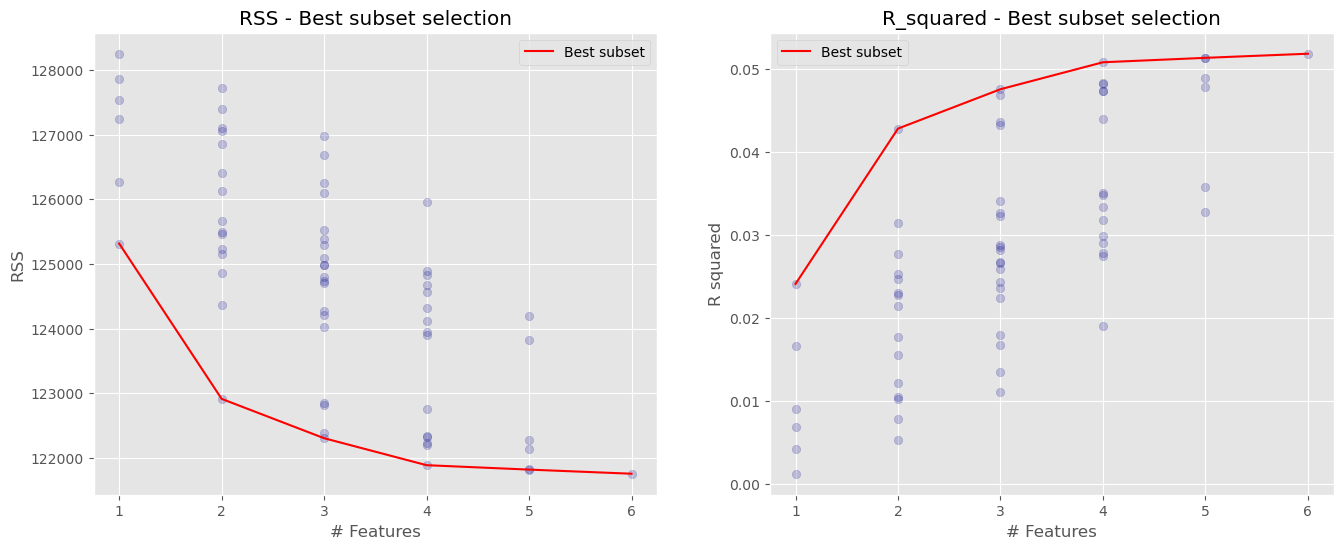

In [176]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(df.numb_features,df.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show()

## Forward Selection

In [179]:
#Initialization variables
Y = target
X = predictors
k = 6 

remaining_features = list(X.columns.values)       # list of all available features
features = []                                    # list to store selected features
RSS_list, R_squared_list = [np.inf], [np.inf]   # due to 1 indexing of the loop.....
features_list = dict()                         # dictionary to store the selected features after each step of the selection process

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   # stores temporary result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

In [180]:
#Displaying results of the first 4 steps

print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], round(RSS_list[i])) for i in range(1,k+1)])

Forward stepwise subset selection
Number of features | Features | RSS


[(1, ['LOAN_PURPOSE'], 125316),
 (2, ['LOAN_PURPOSE', 'CREDIT_SCORE'], 122911),
 (3,
  ['LOAN_PURPOSE', 'CREDIT_SCORE', 'ORIGINAL_DEBT_TO_INCOME_RATIO'],
  122302),
 (4,
  ['LOAN_PURPOSE',
   'CREDIT_SCORE',
   'ORIGINAL_DEBT_TO_INCOME_RATIO',
   'NUMBER_OF_BORROWERS'],
  121884),
 (5,
  ['LOAN_PURPOSE',
   'CREDIT_SCORE',
   'ORIGINAL_DEBT_TO_INCOME_RATIO',
   'NUMBER_OF_BORROWERS',
   'FIRST_TIME_HOMEBUYER_FLAG'],
  121816),
 (6,
  ['LOAN_PURPOSE',
   'CREDIT_SCORE',
   'ORIGINAL_DEBT_TO_INCOME_RATIO',
   'NUMBER_OF_BORROWERS',
   'FIRST_TIME_HOMEBUYER_FLAG',
   'POSTAL_CODE'],
  121752)]

In [181]:
[i for i in reversed(range(1,10))]

[9, 8, 7, 6, 5, 4, 3, 2, 1]

## Lasso and Ridge Regression

In [183]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import root_mean_squared_error

In [184]:
#Ridge Regression
ridge_model = Ridge(alpha = 1.0)  # alpha is the regularization parameter "lambda"
ridge_model.fit(x_train, y_train)

#Predict and evaluate Ridge
ridge_train_pred = ridge_model.predict(x_train)
ridge_test_pred = ridge_model.predict(x_test)

print("Ridge Regression")
print("Training RMSE:", root_mean_squared_error(y_train, ridge_train_pred))
print("Testing RMSE:", root_mean_squared_error(y_test, ridge_test_pred))
print("Coefficients:", ridge_model.coef_)

Ridge Regression
Training RMSE: 0.5793411943013071
Testing RMSE: 0.5817501693682584
Coefficients: [-1.46343757e-03  4.39344510e-02  3.51819353e-03 -6.61114455e-02
 -4.43069577e-07  1.13668586e-01]


In [185]:
#Lasso Regression
lasso_model = Lasso(alpha = 1)  # alpha is the regularization parameter "lambda"
lasso_model.fit(x_train, y_train)

#Predict and evaluate Lasso
lasso_train_pred = lasso_model.predict(x_train)
lasso_test_pred = lasso_model.predict(x_test)

print("\nLasso Regression")
print("Training RMSE:", root_mean_squared_error(y_train, lasso_train_pred))
print("Testing RMSE:", root_mean_squared_error(y_test, lasso_test_pred))
print("Coefficients:", lasso_model.coef_)


Lasso Regression
Training RMSE: 0.59008579677279
Testing RMSE: 0.5920441296812339
Coefficients: [-1.10627750e-03  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -6.76012737e-07  0.00000000e+00]


In [193]:
#Identify the important features that are kept (non-zero coefficients)
lasso_selected_features = [feature for feature, coef in zip(x_train.columns, lasso_model.coef_) if coef != 0]

print("Selected Features by Lasso Regression:", lasso_selected_features)

Selected Features by Lasso Regression: ['CREDIT_SCORE', 'POSTAL_CODE']
